In [8]:
import pandas as pd
import numpy as np

In [9]:
dataset = pd.read_csv("IMDB Dataset.csv", encoding = 'latin-1')

In [10]:
dataset


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [12]:
dataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [17]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def fast_clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters
    text = text.lower().split()  # Tokenize
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    return " ".join(text)

In [19]:
dataset['cleaned_review'] = dataset['review'] \
    .str.replace(r'<.*?>', '', regex=True) \
    .str.replace(r'[^a-zA-Z]', ' ', regex=True) \
    .str.lower() \
    .apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

print(dataset.head())

                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                      cleaned_review  
0  one reviewers mentioned watching oz episode ho...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake thinks zombie...  
4  petter mattei love time money visually stunnin...  


In [20]:
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Ensure tokenization model is downloaded

dataset['tokenized_review'] = dataset['cleaned_review'].apply(word_tokenize)
print(dataset.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                      cleaned_review  \
0  one reviewers mentioned watching oz episode ho...   
1  wonderful little production filming technique ...   
2  thought wonderful way spend time hot summer we...   
3  basically family little boy jake thinks zombie...   
4  petter mattei love time money visually stunnin...   

                                    tokenized_review  
0  [one, reviewers, mentioned, watching, oz, epis...  
1  [wonderful, little, production, filming, techn...  
2  [thought, wonderful, way, spend, time, hot, su...  
3  [basically, family, little, boy, jake, thin

In [26]:
tfidf = TfidfVectorizer(
    max_features=10000,  # Increase vocab size
    ngram_range=(1, 2),  # Use both single words and bigrams
    stop_words='english'  # Remove stopwords automatically
)
X = tfidf.fit_transform(dataset['cleaned_review']).toarray()


In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)  # More iterations for better convergence
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("New Accuracy:", accuracy_score(y_test, y_pred))

New Accuracy: 0.8923


In [42]:
from sklearn.metrics import classification_report
y_pred = (model.predict(X_test_padded) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4961
           1       0.88      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



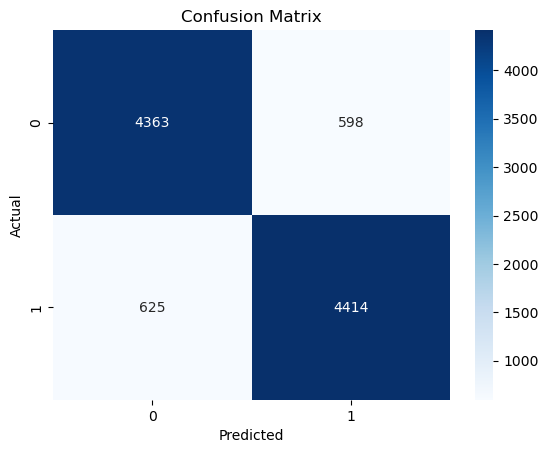

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [33]:
# Load dataset
dataset = pd.read_csv("IMDB Dataset.csv", encoding="latin-1")

# Encode labels ('positive' -> 1, 'negative' -> 0)
label_encoder = LabelEncoder()
dataset['sentiment'] = label_encoder.fit_transform(dataset['sentiment'])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(dataset['review'], dataset['sentiment'], test_size=0.2, random_state=42)

# Tokenization and Padding
max_words = 10000  # Maximum number of words in tokenizer
max_len = 200  # Maximum review length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post', truncating='post')


In [38]:
# Build LSTM model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (0 or 1)
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, max_len))
# Model Summary
model.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 200, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 200, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,342,913 (5.12 MB)

 Trainable params: 1,342,913 (5.12 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 120s 94ms/step - accuracy: 0.5139 - loss: 0.6927 - val_accuracy: 0.4961 - val_loss: 0.7026
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 121s 97ms/step - accuracy: 0.5611 - loss: 0.6710 - val_accuracy: 0.5326 - val_loss: 0.6835
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 130s 104ms/step - accuracy: 0.5637 - loss: 0.6709 - val_accuracy: 0.7931 - val_loss: 0.4743
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 135s 98ms/step - accuracy: 0.8355 - loss: 0.3951 - val_accuracy: 0.8739 - val_loss: 0.3100
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 122s 97ms/step - accuracy: 0.9053 - loss: 0.2525 - val_accuracy: 0.8777 - val_loss: 0.2956


In [40]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8804 - loss: 0.2912
Test Accuracy: 0.8777
Test Loss: 0.2956


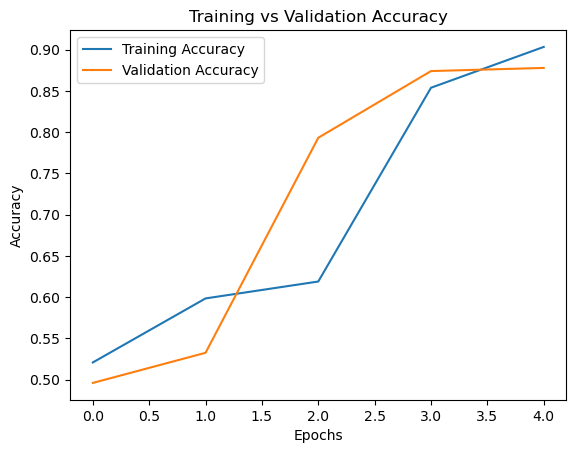

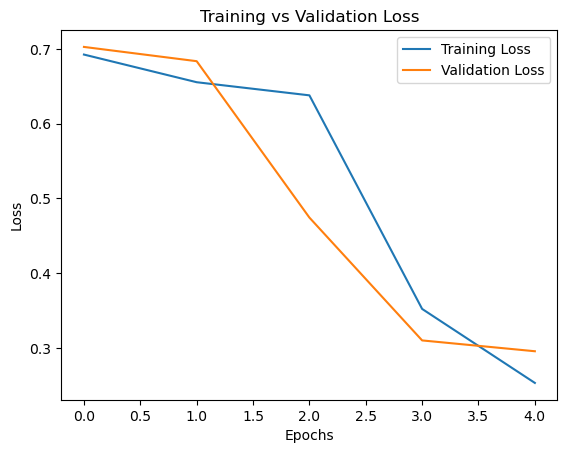

In [45]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


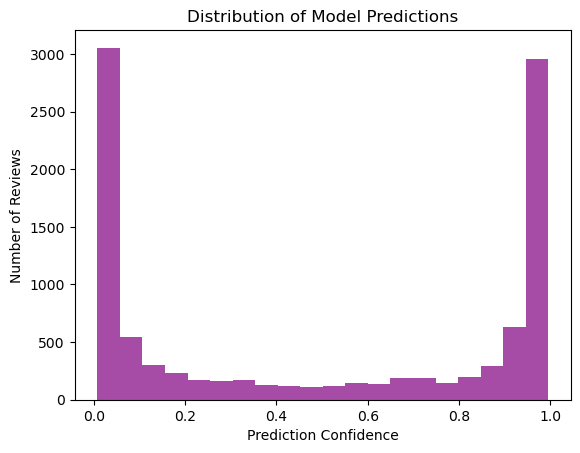

In [49]:


predictions = model.predict(X_test_padded)
plt.hist(predictions, bins=20, color="purple", alpha=0.7)
plt.xlabel("Prediction Confidence")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Model Predictions")
plt.show()

In [60]:
sample_review = ["The movie started well but got boring halfway."]
sample_seq = tokenizer.texts_to_sequences(sample_review)
sample_padded = pad_sequences(sample_seq, maxlen=100)

prediction = model.predict(sample_padded)[0][0]  # Extract single value
sentiment = "Positive" if prediction > 0.6 else "Negative"

print(f"Predicted Sentiment: {sentiment} (Score: {prediction:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted Sentiment: Negative (Score: 0.2368)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


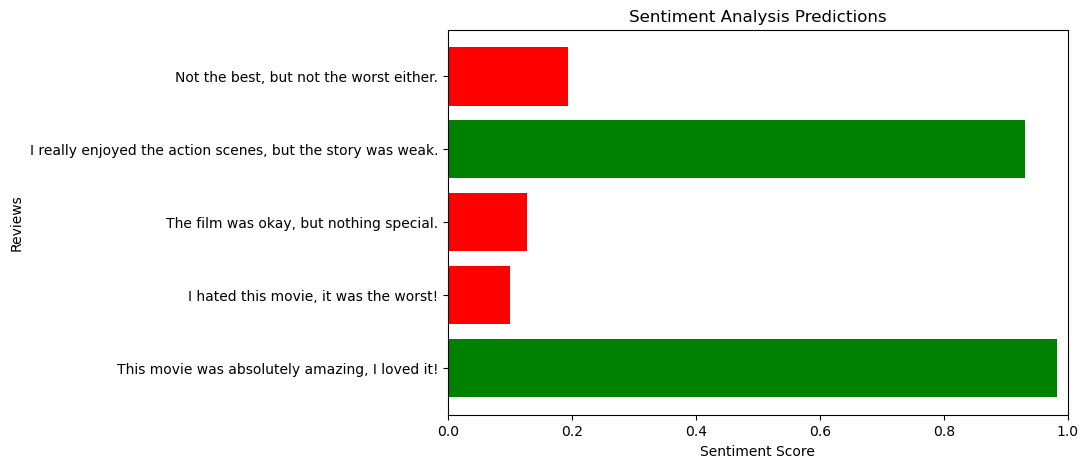

Review: This movie was absolutely amazing, I loved it!
Predicted Sentiment: Positive (Score: 0.9823)

Review: I hated this movie, it was the worst!
Predicted Sentiment: Negative (Score: 0.1007)

Review: The film was okay, but nothing special.
Predicted Sentiment: Negative (Score: 0.1286)

Review: I really enjoyed the action scenes, but the story was weak.
Predicted Sentiment: Positive (Score: 0.9304)

Review: Not the best, but not the worst either.
Predicted Sentiment: Negative (Score: 0.1942)



In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Sample test reviews
test_reviews = [
    "This movie was absolutely amazing, I loved it!",
    "I hated this movie, it was the worst!",
    "The film was okay, but nothing special.",
    "I really enjoyed the action scenes, but the story was weak.",
    "Not the best, but not the worst either."
]

# Convert reviews to sequences
test_sequences = tokenizer.texts_to_sequences(test_reviews)
test_padded = pad_sequences(test_sequences, maxlen=100)

# Get predictions
predictions = model.predict(test_padded)

# Convert to sentiment labels
sentiments = ["Positive" if p > 0.6 else "Negative" for p in predictions]

# Plot the results
plt.figure(figsize=(8,5))
plt.barh(test_reviews, predictions.flatten(), color=['green' if s=="Positive" else 'red' for s in sentiments])
plt.xlabel("Sentiment Score")
plt.ylabel("Reviews")
plt.title("Sentiment Analysis Predictions")
plt.xlim(0, 1)  # Scores range from 0 to 1
plt.show()

# Print results
for review, score, sentiment in zip(test_reviews, predictions, sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment} (Score: {score[0]:.4f})\n")

